# Visualization Word2Vec with T-SNE algorithm
---

In [1]:
import os
import sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]+['paper_code']))
# package load
import torch
import numpy as np
import matplotlib.pyplot as plt

from WORD2VEC.preprocessing import preprocess
from WORD2VEC.word2vec_dataloader import CustomDataset
from WORD2VEC.word2vec_utils import most_similar
from WORD2VEC.model import Word2Vec

In [2]:
# USE_CUDA = torch.cuda.is_available()
USE_CUDA = False
DEVICE = 'cuda' if USE_CUDA else None
WINDOW_SIZE = 2
N_WORDS = 10000000 # only trained first 10,000,000 words

datas = [preprocess('../data/wiki/enwik9_text')[0][:N_WORDS]]
train_data = CustomDataset(datas, window=WINDOW_SIZE, device=DEVICE)
V = len(train_data.vocab)
EMBED = 300
model = Word2Vec(V, EMBED)
if USE_CUDA:
    model = model.cuda()
model.load_state_dict(torch.load('../paper_code/WORD2VEC/model/word2vec_wiki.model'))

In [3]:
word_vectors = model.embedding_w.weight.detach().numpy()
vocab = train_data.vocab

Because of training takes soooo long using TSNE. So, i've pretrained them, codes are in `/paper_code/WORD2VEC/tsne.py`.

In [4]:
transformed = np.load('../paper_code/WORD2VEC/model/t_sne.npy')
print('shape of transformed vectors by t-sne {}, total vocab size is {}'.format(transformed.shape, len(vocab)))

shape of transformed vectors by t-sne (189076, 2), total vocab size is 189076


In [5]:
def get_similar_words(words, w_vectors, vocab, k=10):
    ws = []
    for w in words:
        ws.extend(list(zip(*most_similar(w, w_vectors, vocab, k)))[0])
    for w in words:
        if w not in ws:
            ws.append(w)
    ws_idx = sorted([vocab.stoi.get(w) for w in ws])
    ws_sorted = [vocab.itos[i] for i in ws_idx]
    print('total {} words'.format(len(ws_sorted)))
    return ws_idx, ws_sorted

In [6]:
def plot_words(ws, ws_idx, vectors):
    xs = vectors[ws_idx, 0]
    ys = vectors[ws_idx, 1]
    
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.add_subplot(111)
    ax.scatter(xs, ys, s=1)
    for i, w in enumerate(ws):
        ax.annotate(w, (xs[i], ys[i]))

    plt.show()

total 20 words


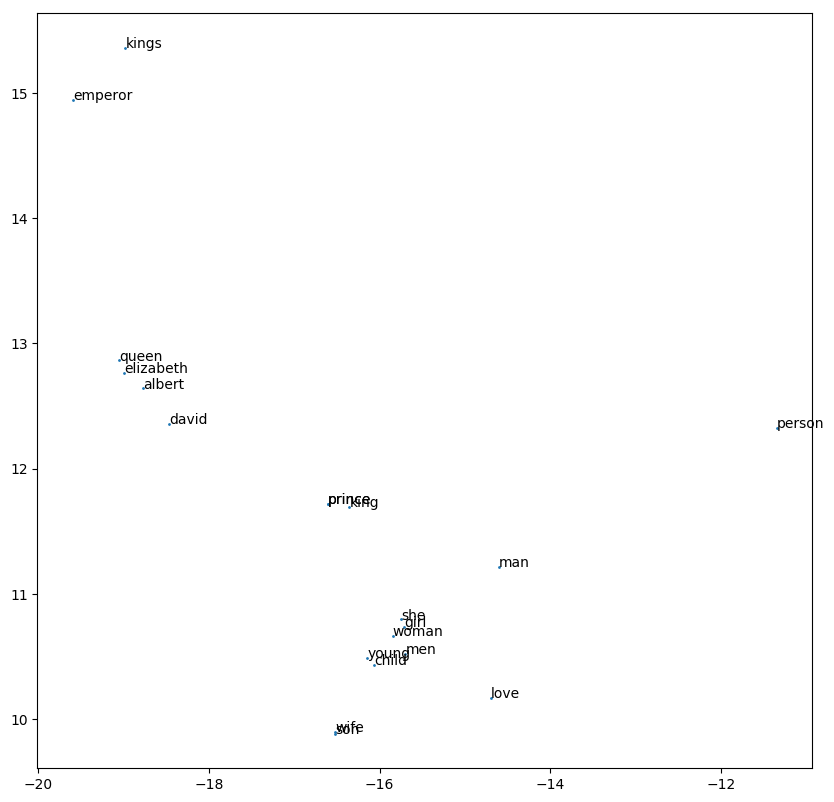

In [7]:
words = ['king', 'queen', 'man', 'woman']
words_idx, words_sorted = get_similar_words(words, w_vectors=word_vectors, vocab=train_data.vocab, k=5)
plot_words(ws=words_sorted, ws_idx=words_idx, vectors=transformed)

total 18 words


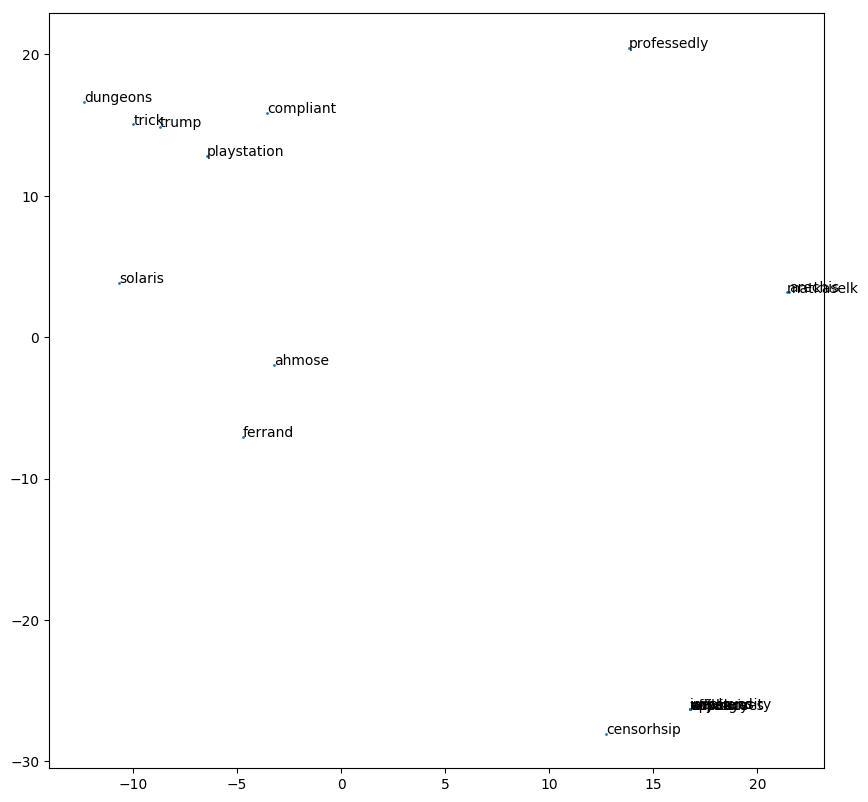

choiced words ['trump' 'voyance' 'arechis']
simlar words ['compliant', 'solaris', 'trick', 'playstation', 'dungeons', 'trump', 'weakend', 'ahmose', 'ferrand', 'efficiacy', 'apologises', 'professedly', 'arechis', 'impetuosity', 'censorhsip', 'matkaselk', 'voyance', 'railles']


In [12]:
words = np.random.choice(vocab.itos, size=3, replace=False)
words_idx, words_sorted = get_similar_words(words, w_vectors=word_vectors, vocab=train_data.vocab, k=5)
plot_words(ws=words_sorted, ws_idx=words_idx, vectors=transformed)
print('choiced words', words)
print('simlar words', words_sorted)